In [5]:
from pycaret.regression import *

In [6]:
import numpy as np
import pandas as pd 

In [7]:
#henter inn trenings og testsettet 
train = pd.read_csv(r"C:\Users\Bruker\dat158-ml-course21\data\train.csv")
test = pd.read_csv(r"C:\Users\Bruker\dat158-ml-course21\data\train.csv")

In [ ]:
#vi har brukt følgende nettside for inspirasjon:
#https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb?fbclid=IwAR3EnHO0FBh4TZzCFi8UaV_vJr2VKet8R3VYpR3IpvFZkD1AWzJ8LynjFCg

In [8]:
#sjekker størrelsen på treningssettet
train.shape

(1460, 81)

In [40]:
#setter opp data og ønsker at det skal være normalisert og outliers fjernet
data = setup(data = train, target = 'SalePrice', normalize=True, remove_outliers = True)

,Description,Value
0,session_id,8892
1,Target,SalePrice
2,Original Data,"(1460, 81)"
3,Missing Values,True
4,Numeric Features,19
5,Categorical Features,61
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(970, 352)"


In [41]:
#henter ut de beste modellene, ser at dette er huber, bayesian ridge og ridge regression
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,14821.1687,530475530.9919,22792.3923,0.9061,0.1202,0.0857,0.4170
br,Bayesian Ridge,15406.6119,530044693.0648,22840.7893,0.9044,0.1259,0.0915,0.2550
ridge,Ridge Regression,15958.5709,544395108.3280,23187.4024,0.9009,0.1328,0.0952,0.0320
omp,Orthogonal Matching Pursuit,16444.2454,580690481.9078,23917.1462,0.8957,0.1358,0.0987,0.0380
par,Passive Aggressive Regressor,15164.1502,627745530.2112,24517.1014,0.8933,0.1211,0.0867,0.5010
llar,Lasso Least Angle Regression,16910.8560,601259604.0342,24374.3046,0.8910,0.1454,0.1009,1.0140
lasso,Lasso Regression,17430.1468,634764795.8294,25056.7824,0.8848,0.1522,0.1046,0.1490
gbr,Gradient Boosting Regressor,16368.8138,660470515.2449,25360.6195,0.8836,0.1308,0.0942,0.5890
lightgbm,Light Gradient Boosting Machine,16480.8521,709473842.8451,26243.7443,0.8760,0.1319,0.0940,0.4190
en,Elastic Net,18027.5405,843500473.6339,28379.4134,0.8575,0.1405,0.1041,0.0360


In [42]:
#lager modell for huber
huber = create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,14933.5486,655117277.5404,25595.2589,0.9072,0.1082,0.0845
1,15298.2571,603538600.6601,24567.0226,0.9242,0.1085,0.0811
2,15359.8904,766154908.6205,27679.5034,0.9071,0.1132,0.0805
3,11977.2888,305050342.7544,17465.6904,0.9284,0.1067,0.0769
4,13412.1958,356848542.3889,18890.4352,0.9369,0.1179,0.0823
5,13143.6993,336887264.1979,18354.4889,0.9083,0.1053,0.0744
6,14806.2375,491278949.8733,22164.8133,0.8990,0.1270,0.0880
7,16401.3606,535098489.2765,23132.1959,0.8608,0.1436,0.1004
8,17214.6096,663714794.6795,25762.6628,0.9054,0.1489,0.1000
9,15664.5992,591066139.9272,24311.8518,0.8837,0.1221,0.0891


In [43]:
#printer huber
print(huber)

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)


In [54]:
#tuner huber, observerer at RMSE blir lavere noe som er bra
tuned_huber = tune_model(huber, n_iter=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,14990.5211,642819424.7355,25353.8838,0.9089,0.1074,0.0845
1,15352.7356,592838095.7533,24348.2668,0.9256,0.1085,0.0816
2,15522.0970,763945331.0713,27639.5610,0.9074,0.1140,0.0818
3,11939.5962,302726637.9467,17399.0413,0.9290,0.1060,0.0766
4,13395.5035,362069449.4362,19028.1226,0.9359,0.1174,0.0822
5,13335.6234,340835174.6814,18461.7219,0.9072,0.1068,0.0757
6,14702.9154,493624813.1389,22217.6689,0.8985,0.1261,0.0865
7,16212.4537,527354402.5225,22964.1983,0.8628,0.1413,0.0989
8,17391.4866,665549191.3776,25798.2401,0.9052,0.1513,0.1016
9,15684.5492,591987011.8624,24330.7832,0.8836,0.1222,0.0891


In [46]:
#lager modell for bayesian ridge
br = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15949.8526,613525556.2105,24769.4480,0.9131,0.1240,0.0944
1,14766.3148,460018333.8492,21448.0380,0.9422,0.1044,0.0807
2,15821.4455,726537758.8884,26954.3644,0.9119,0.1237,0.0886
3,14050.5724,411212508.8704,20278.3754,0.9035,0.1284,0.0921
4,13872.8071,367379514.0202,19167.1467,0.9350,0.1190,0.0866
5,13302.4605,316636537.0232,17794.2838,0.9138,0.1084,0.0780
6,16223.5966,589776847.2076,24285.3216,0.8787,0.1312,0.0955
7,16750.4566,538471139.1628,23204.9809,0.8599,0.1448,0.1057
8,17599.6742,681656728.8993,26108.5566,0.9029,0.1507,0.1018
9,15728.9389,595232006.5162,24397.3770,0.8829,0.1246,0.0916


In [52]:
#tuner modellen, observerer at denne blir bedre men ikke bedre enn huber tunet
tuned_br = tune_model(br, n_iter=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16264.0037,632697167.3043,25153.4723,0.9104,0.1241,0.0956
1,14955.0881,463588991.6835,21531.1168,0.9418,0.1138,0.0838
2,16128.4653,734014859.2191,27092.7086,0.9110,0.1231,0.0895
3,13983.1015,378686698.8856,19459.8741,0.9111,0.1261,0.0916
4,13851.3016,366966002.8952,19156.3567,0.9351,0.1188,0.0865
5,13481.2892,323041642.7905,17973.3593,0.9120,0.1118,0.0793
6,16551.4605,598279102.2355,24459.7445,0.8770,0.1320,0.0971
7,16892.0230,535073483.5147,23131.6554,0.8608,0.1445,0.1064
8,17577.4431,678929338.6479,26056.2725,0.9033,0.1509,0.1019
9,15820.3459,593383243.6214,24359.4590,0.8833,0.1273,0.0933


In [53]:
#prøver å tune med å optimalisere MAE, blir ikke bedre
tuned_br1 = tune_model(br, n_iter=50, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15949.7602,613451706.3991,24767.9573,0.9131,0.1239,0.0944
1,14766.4380,459973381.2940,21446.9900,0.9422,0.1044,0.0807
2,15821.0679,726493717.5480,26953.5474,0.9119,0.1237,0.0886
3,14050.7800,411204603.8214,20278.1805,0.9035,0.1284,0.0921
4,13872.4574,367391090.3866,19167.4487,0.9350,0.1190,0.0866
5,13302.4584,316668189.6414,17795.1732,0.9138,0.1085,0.0780
6,16224.9558,589839385.9838,24286.6092,0.8787,0.1312,0.0955
7,16750.3356,538467761.7795,23204.9081,0.8599,0.1448,0.1057
8,17599.4643,681617868.4275,26107.8124,0.9029,0.1507,0.1018
9,15728.3704,595167183.1523,24396.0485,0.8829,0.1246,0.0916


In [48]:
#lager modell for ridge regression
ridge = create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16543.2135,593452401.0212,24360.8785,0.9159,0.1178,0.0933
1,15138.5875,450284459.5450,21219.9072,0.9435,0.1197,0.0894
2,16280.4761,736198826.6156,27132.9841,0.9108,0.1235,0.0885
3,14345.8661,408261944.8360,20205.4929,0.9042,0.1364,0.0963
4,14260.2101,428326577.7936,20696.0522,0.9242,0.1247,0.0883
5,14035.9592,367672063.3845,19174.7767,0.8999,0.1191,0.0828
6,18573.9121,679643781.2402,26069.9785,0.8602,0.1437,0.1081
7,16782.4274,558204239.8800,23626.3463,0.8548,0.1527,0.1049
8,17755.5354,664361651.2615,25775.2139,0.9053,0.1595,0.1075
9,15869.5215,557545137.7026,23612.3937,0.8903,0.1312,0.0933


In [49]:
#tuner ridge regression, blir bedre enn original men ikke bedre enn huber tunet
tuned_ridge = tune_model(ridge)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16230.2863,612451773.4668,24747.7630,0.9132,0.1220,0.0950
1,14942.0660,451872946.3101,21257.3034,0.9433,0.1160,0.0849
2,16138.4644,728500086.5044,26990.7408,0.9117,0.1220,0.0891
3,13972.5492,377833397.4434,19437.9371,0.9113,0.1275,0.0921
4,13813.7419,374204724.0575,19344.3719,0.9338,0.1196,0.0860
5,13494.1602,330635753.0760,18183.3922,0.9100,0.1127,0.0793
6,16876.6799,612566105.2381,24750.0728,0.8740,0.1336,0.0989
7,16815.7219,535846084.6702,23148.3495,0.8606,0.1452,0.1055
8,17521.7780,670537508.9214,25894.7390,0.9045,0.1518,0.1025
9,15704.6480,575603017.2576,23991.7281,0.8868,0.1266,0.0926


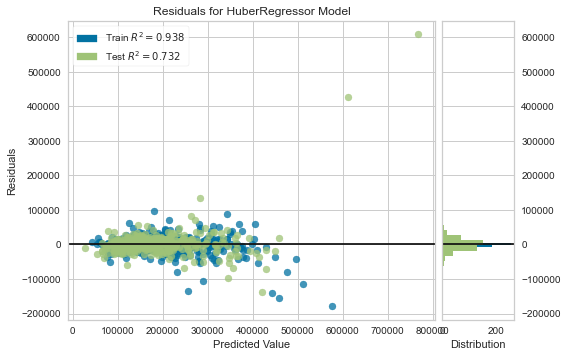

In [55]:
#velger å gå for tuned_huber ettersom denne gir best score på RMSE
plot_model(tuned_huber)

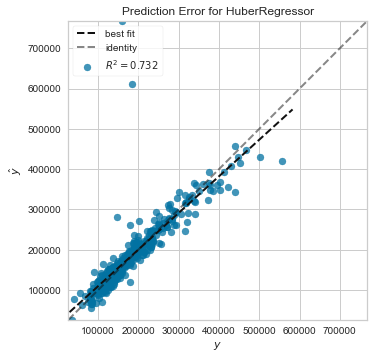

In [56]:
plot_model(tuned_huber, plot = 'error')

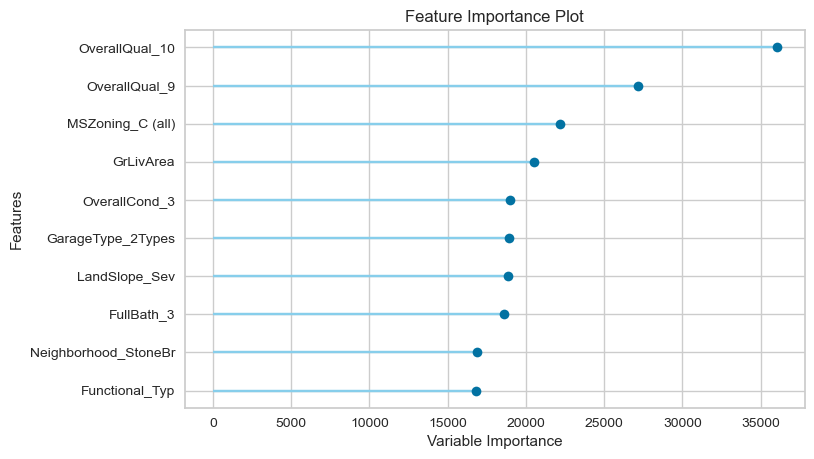

In [57]:
#sjekker de viktigste featurene i settet
plot_model(tuned_huber, plot='feature')

In [58]:
#predicter hele settet med tuned_huber
predict_model(tuned_huber);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,16526.8637,1702829572.3129,41265.3556,0.7319,0.1538,0.1004


In [59]:
final_huber = finalize_model(tuned_huber)

In [60]:
print(final_huber)

HuberRegressor(alpha=0.0001, epsilon=1.4, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)


In [61]:
predict_model(final_huber);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,13009.2167,1427130935.9991,37777.3866,0.7753,0.1319,0.0771


In [62]:
#henter inn testsettet og bruker det med final_huber
test_predictions = predict_model(final_huber, data=test)
test_predictions.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Label
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,205079.236281
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,191729.625439
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,213411.912360
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,180577.130830
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,291688.061234


In [64]:
#sjekker R2 verdien og den blir høyere enn noensinne
from pycaret.utils import check_metric
check_metric(test_predictions.SalePrice, test_predictions.Label, 'R2')

0.8809

In [65]:
#lagrer modellen
save_model(final_huber,'Final Huber Model 10Nov2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=['Id'],
                                       ml_usecase='regression',
                                       numerical_features=[], target='SalePrice',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                 ('dummy', Dummify(target='SalePrice')),
                 ('fix_perfect', Remove_100(target='SalePrice')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
              